In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangalore-house-price-prediction/Bengaluru_House_Data.csv


Dataset loaded successfully.
Original dataset shape: (13320, 9)
Original dataset columns: ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']

Original dataset head:
               area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

Original dataset info:



/tmp/ipykernel_31/1758608347.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna(balcony_median, inplace=True)
/tmp/ipykernel_31/1758608347.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Removed price_per_sqft outliers (kept data within 1 std dev per location). Shape: (10111, 8)
Removed bathroom outliers (bath < bhk + 2). Shape: (10006, 8)

Number of unique locations: 805
Number of locations with <= 10 data points: 619
Grouped infrequent locations into 'Other'. New unique locations: 187
Applied One-Hot Encoding. Final shape: (10006, 194)

Final columns after preprocessing:
 ['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'area_type_Carpet  Area', 'area_type_Plot  Area', 'area_type_Super built-up  Area', 'location_1st Phase JP Nagar', 'location_2nd Stage Nagarbhavi', 'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambalipura', 'location_Ambedkar Nagar', 'location_Amruthahalli', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Ardendale', 'location_Arekere',

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


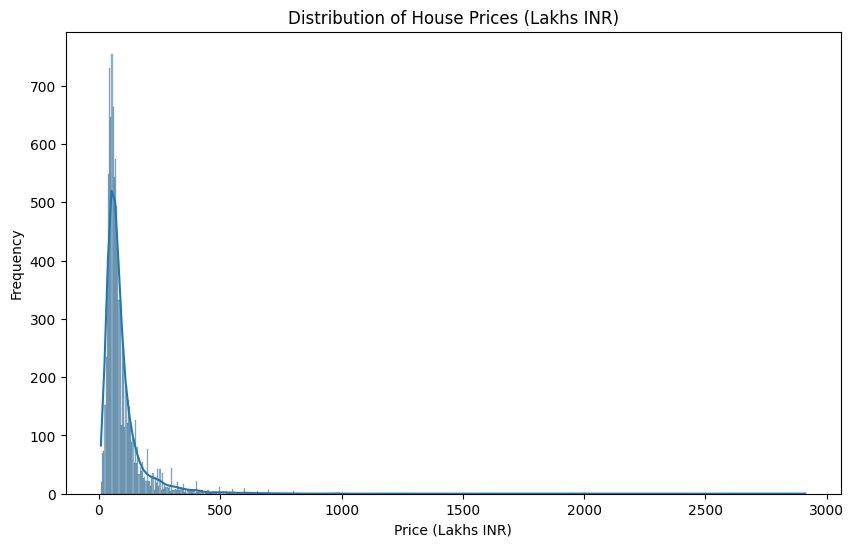

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


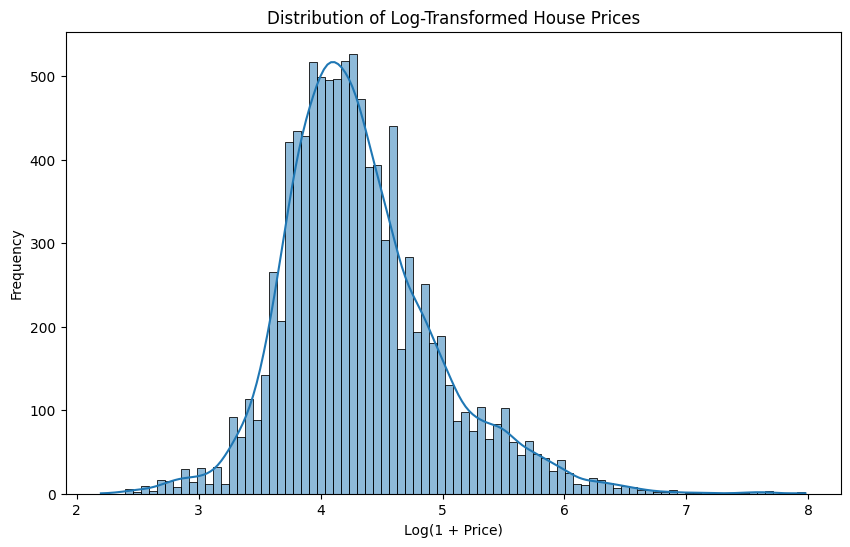

Displayed histograms for original and log-transformed price distribution.
-----------------------------------


--- Data Partitioning and Scaling ---
Training set shape: X=(7004, 193), y=(7004,)
Validation set shape: X=(1501, 193), y=(1501,)
Test set shape: X=(1501, 193), y=(1501,)
Applied StandardScaler to features (X) and target (y).
--------------------------------------


--- MLP Implementation from Scratch ---
MLPRegressor class defined with activation functions and optimizers.
--------------------------------------

Number of features detected for MLP input layer: 193

--- Hyperparameter Tuning & Evaluation ---

--- Running Iteration 1/32 ---
Config: LR=0.01, Epochs=200, Arch=[193, 64, 32, 1], Act=relu, Opt=minibatch
Epoch 0: Train Cost = 0.459413, Val Cost = 0.316464
Epoch 50: Train Cost = 0.123477, Val Cost = 0.123961
Epoch 100: Train Cost = 0.097513, Val Cost = 0.114731
Epoch 150: Train Cost = 0.087877, Val Cost = 0.103968
Epoch 199: Train Cost = 0.078701, Val Cost = 0.090934


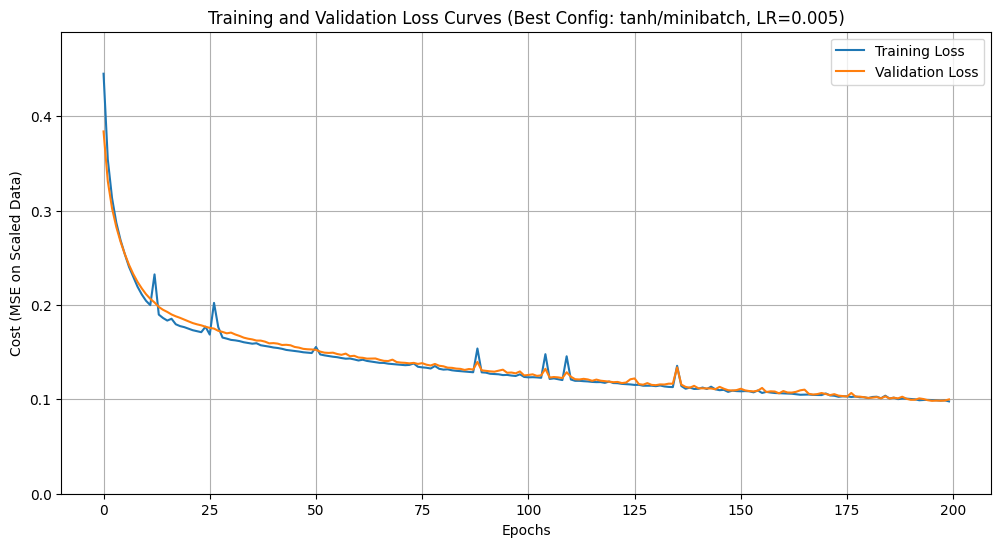


--- Analysis Complete ---


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import time
import math

# Set random seed for reproducibility
np.random.seed(42)

# --- 2.2.1 Dataset ---
# NOTE: You need to download the CSV from the provided Google Drive link
# and place it in the same directory as the script, or provide the full path.
try:
    file_path = "/kaggle/input/bangalore-house-price-prediction/Bengaluru_House_Data.csv"
    df_original = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Original dataset shape:", df_original.shape)
    print("Original dataset columns:", df_original.columns.tolist())
    print("\nOriginal dataset head:\n", df_original.head())
    print("\nOriginal dataset info:\n")
    df_original.info()
except FileNotFoundError:
    print("Error: Bengaluru_House_Data.csv not found.")
    print("Please download the dataset from the provided Google Drive link and place it in the correct directory.")
    exit()

# --- 2.2.2 Data Preprocessing ---
print("\n--- Data Preprocessing ---")

# Create a copy for preprocessing
df = df_original.copy()

# 1. Handle Missing Values
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Drop 'society' due to high percentage of missing values (and high cardinality)
df = df.drop('society', axis=1)
print("\nDropped 'society' column.")

# Drop 'availability' as it requires complex feature engineering (dates)
# and might not be the primary driver for this exercise focus.
df = df.drop('availability', axis=1)
print("Dropped 'availability' column.")

# Fill missing 'balcony' values with the median
# Median is often better than mean for discrete counts like balconies
balcony_median = df['balcony'].median()
df['balcony'].fillna(balcony_median, inplace=True)
print(f"Filled missing 'balcony' values with median ({balcony_median}).")

# Fill missing 'bath' values with the median
bath_median = df['bath'].median()
df['bath'].fillna(bath_median, inplace=True)
print(f"Filled missing 'bath' values with median ({bath_median}).")

# Drop rows with missing 'location' or 'size' as they are essential features
# and relatively few compared to the dataset size.
df.dropna(subset=['location', 'size'], inplace=True)
print("Dropped rows with missing 'location' or 'size'.")

print("\nMissing values after initial handling:\n", df.isnull().sum())
print("Shape after initial handling:", df.shape)

# 2. Feature Engineering and Cleaning
# Clean 'size' column (e.g., '2 BHK' -> 2)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)
print("\nCreated 'bhk' column from 'size' and dropped 'size'.")

# Clean 'total_sqft' column (handle ranges and convert to numeric)
def convert_sqft_to_num(x):
    """Converts 'total_sqft' entries to numeric, handling ranges."""
    if isinstance(x, (int, float)):
        return x
    tokens = x.split('-')
    if len(tokens) == 2:
        try:
            return (float(tokens[0]) + float(tokens[1])) / 2
        except ValueError:
            return None # Handle cases like '1000 - 1200 Sq. Meter' if not caught below
    try:
        # Try converting directly, handles numbers as strings
        return float(x)
    except ValueError:
         # Handle other units like Sq. Meter, Perch etc. - Return None for simplicity
         # More advanced handling could convert these if conversion factors are known
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=['total_sqft'], inplace=True) # Drop rows where conversion failed
print("Cleaned 'total_sqft', converting ranges to averages and dropping non-convertible rows.")
print("Shape after cleaning 'total_sqft':", df.shape)

# Check data types after cleaning
print("\nData types after cleaning 'size' and 'total_sqft':\n", df.dtypes)

# 3. Outlier Removal
# Add price_per_sqft feature for outlier detection
# Price is in Lakhs (100,000), so multiply by 100000
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
print("\nCreated 'price_per_sqft' for outlier analysis.")
print(df['price_per_sqft'].describe())

# Function to remove price_per_sqft outliers based on mean and std dev per location
def remove_pps_outliers(df_in):
    df_out = pd.DataFrame()
    for key, subdf in df_in.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - 1 * st)) & (subdf.price_per_sqft <= (m + 1 * st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
print(f"Removed price_per_sqft outliers (kept data within 1 std dev per location). Shape: {df.shape}")

# Remove bathroom outliers (more bathrooms than bhk + 2 seems unlikely)
df = df[df.bath < df.bhk + 2]
print(f"Removed bathroom outliers (bath < bhk + 2). Shape: {df.shape}")

# Drop the temporary 'price_per_sqft' column
df = df.drop('price_per_sqft', axis=1)

# 4. Handle High Cardinality Categorical Features ('location')
location_stats = df['location'].value_counts()
print(f"\nNumber of unique locations: {len(location_stats)}")
locations_less_than_10 = location_stats[location_stats <= 10]
print(f"Number of locations with <= 10 data points: {len(locations_less_than_10)}")

# Group less frequent locations into 'Other'
df['location'] = df['location'].apply(lambda x: 'Other' if x in locations_less_than_10 else x)
print(f"Grouped infrequent locations into 'Other'. New unique locations: {df['location'].nunique()}")

# 5. One-Hot Encode Categorical Features ('area_type', 'location')
df = pd.get_dummies(df, columns=['area_type', 'location'], drop_first=True)
print(f"Applied One-Hot Encoding. Final shape: {df.shape}")
print("\nFinal columns after preprocessing:\n", df.columns.tolist())

# --- Record of Preprocessing Steps ---
print("\n--- Preprocessing Summary ---")
print("1. Loaded data: Bengaluru_House_Data.csv")
print("2. Dropped columns: 'society' (many missing), 'availability' (complex format)")
print("3. Imputed missing values: 'balcony' and 'bath' with their respective medians.")
print("4. Dropped rows with missing values in 'location' and 'size'.")
print("5. Engineered 'bhk' feature from 'size' (numeric). Dropped 'size'.")
print("6. Cleaned 'total_sqft': Converted ranges to averages, converted to numeric, dropped rows with non-convertible values (e.g., different units).")
print("7. Removed outliers based on 'price_per_sqft' (within 1 standard deviation per location).")
print("8. Removed outliers based on bathroom count (bath < bhk + 2).")
print("9. Reduced cardinality of 'location' by grouping locations with <= 10 entries into 'Other'.")
print("10. Applied One-Hot Encoding to 'area_type' and 'location' (drop_first=True).")
print("-----------------------------\n")


# --- Descriptive Statistics ---
print("\n--- Descriptive Statistics (Cleaned Data) ---")
# Ensure all columns used for stats are numeric (should be after preprocessing)
numeric_cols = df.select_dtypes(include=np.number).columns
print(df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']])
print("-------------------------------------------\n")


# --- Visualize Label Distribution ---
print("\n--- Label (Price) Distribution ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices (Lakhs INR)')
plt.xlabel('Price (Lakhs INR)')
plt.ylabel('Frequency')
plt.show()

# Log transform price often helps for skewed distributions in regression
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['price']), kde=True) # log1p handles potential zeros
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Frequency')
plt.show()
print("Displayed histograms for original and log-transformed price distribution.")
print("-----------------------------------\n")

# --- Partition, Normalize, and Standardize ---
print("\n--- Data Partitioning and Scaling ---")
X = df.drop('price', axis=1)
y = df['price'] # Target variable

# Partition into Training (70%), Validation (15%), and Test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15 / (1 - 0.15), random_state=42) # 0.15 / 0.85 ensures 15% validation overall

print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set shape: X={X_val.shape}, y={y_val.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")

# Normalize/Standardize Data
# Standardizing features (X) is crucial for neural networks
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Standardizing the target variable (y) can also help convergence for regression
# We need to store the scaler to inverse transform predictions later for evaluation
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)) # Keep original y_test for final evaluation

print("Applied StandardScaler to features (X) and target (y).")
print("--------------------------------------\n")


# --- 2.2.3 Model Development from Scratch ---
print("\n--- MLP Implementation from Scratch ---")

# --- Activation Functions ---
def sigmoid(Z):
    A = 1 / (1 + np.exp(-np.clip(Z, -500, 500))) # Clip to avoid overflow
    cache = Z
    return A, cache

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-np.clip(Z, -500, 500)))
    dZ = dA * s * (1 - s)
    return dZ

def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def tanh(Z):
    A = np.tanh(Z)
    cache = Z
    return A, cache

def tanh_backward(dA, cache):
    Z = cache
    t = np.tanh(Z)
    dZ = dA * (1 - np.power(t, 2))
    return dZ

# --- MLP Class ---
class MLPRegressor:
    def __init__(self, layer_dims, learning_rate=0.01, activation='relu',
                 optimizer='minibatch', epochs=100, batch_size=64,
                 random_state=None, print_cost_every=10):
        """
        Initialize the MLP Regressor.

        Args:
            layer_dims (list): List containing the number of units in each layer,
                               including input and output layers. E.g., [n_x, n_h1, n_h2, n_y]
            learning_rate (float): The learning rate for gradient descent.
            activation (str): Activation function for hidden layers ('sigmoid', 'tanh', 'relu').
                              Output layer uses linear activation for regression.
            optimizer (str): Optimization algorithm ('sgd', 'batch', 'minibatch').
            epochs (int): Number of passes through the entire dataset.
            batch_size (int): Size of mini-batches for 'minibatch' optimizer. Ignored otherwise.
            random_state (int): Seed for random weight initialization for reproducibility.
            print_cost_every (int): Print cost every specified number of epochs. Set to 0 for no printing.
        """
        self.layer_dims = layer_dims
        self.learning_rate = learning_rate
        self.activation_name = activation.lower()
        self.optimizer = optimizer.lower()
        self.epochs = epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self.print_cost_every = print_cost_every

        self.parameters = {}
        self.costs_train = []
        self.costs_val = []
        self.activation_forward = None
        self.activation_backward = None

        self._select_activation()
        self._initialize_parameters()

    def _select_activation(self):
        """Selects the activation function based on the name."""
        if self.activation_name == 'sigmoid':
            self.activation_forward = sigmoid
            self.activation_backward = sigmoid_backward
        elif self.activation_name == 'tanh':
            self.activation_forward = tanh
            self.activation_backward = tanh_backward
        elif self.activation_name == 'relu':
            self.activation_forward = relu
            self.activation_backward = relu_backward
        else:
            raise ValueError("Invalid activation function. Choose 'sigmoid', 'tanh', or 'relu'.")

    def _initialize_parameters(self):
        """Initializes weights (W) and biases (b) for each layer."""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        L = len(self.layer_dims) # Number of layers including input/output
        for l in range(1, L):
            # Xavier/Glorot initialization often works well for sigmoid/tanh
            # He initialization often works well for ReLU
            scale_factor = np.sqrt(1. / self.layer_dims[l-1]) # Simplified Xavier/He
            if self.activation_name == 'relu':
                scale_factor = np.sqrt(2. / self.layer_dims[l-1]) # He initialization

            self.parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) * scale_factor
            self.parameters['b' + str(l)] = np.zeros((self.layer_dims[l], 1))

    def _linear_forward(self, A_prev, W, b):
        """Linear part of a layer's forward propagation."""
        Z = np.dot(W, A_prev) + b
        cache = (A_prev, W, b)
        return Z, cache

    def _linear_activation_forward(self, A_prev, W, b, activation_func):
        """Forward propagation for one layer (LINEAR -> ACTIVATION)."""
        Z, linear_cache = self._linear_forward(A_prev, W, b)
        A, activation_cache = activation_func(Z)
        cache = (linear_cache, activation_cache)
        return A, cache

    def _forward_propagation(self, X):
        """Implements forward propagation for the entire network."""
        caches = []
        A = X
        L = len(self.parameters) // 2 # Number of layers with weights/biases

        # Hidden layers with specified activation
        for l in range(1, L):
            A_prev = A
            W = self.parameters['W' + str(l)]
            b = self.parameters['b' + str(l)]
            A, cache = self._linear_activation_forward(A_prev, W, b, self.activation_forward)
            caches.append(cache)

        # Output layer (Linear activation for regression)
        W_L = self.parameters['W' + str(L)]
        b_L = self.parameters['b' + str(L)]
        # Using identity function (linear activation) for output Z_L = A_L
        Z_L, cache_L = self._linear_forward(A, W_L, b_L)
        # For regression, AL = ZL (no non-linear activation)
        # The cache structure expects (linear_cache, activation_cache).
        # For linear output, activation_cache is ZL itself.
        linear_cache_L, activation_cache_L = cache_L, Z_L
        caches.append((linear_cache_L, activation_cache_L))
        AL = Z_L # Final output is Z for linear output layer

        return AL, caches


    def _compute_cost(self, AL, Y):
        """Computes the Mean Squared Error cost."""
        m = Y.shape[1]
        cost = (1 / (2 * m)) * np.sum(np.square(AL - Y))
        cost = np.squeeze(cost) # Ensure cost is a scalar
        return cost

    def _linear_backward(self, dZ, linear_cache):
        """Linear part of backward propagation for a single layer."""
        A_prev, W, b = linear_cache
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        return dA_prev, dW, db

    def _linear_activation_backward(self, dA, cache, activation_backward_func):
        """Backward propagation for one layer (LINEAR -> ACTIVATION)."""
        linear_cache, activation_cache = cache
        dZ = activation_backward_func(dA, activation_cache)
        dA_prev, dW, db = self._linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    def _backward_propagation(self, AL, Y, caches):
        """Implements backward propagation for the entire network."""
        grads = {}
        L = len(caches) # Number of layers
        m = AL.shape[1]
        Y = Y.reshape(AL.shape) # Ensure Y has the same shape as AL

        # Derivative of cost function (MSE) w.r.t AL
        # dAL = (1/m) * (AL - Y) # Factor 1/m included in linear_backward
        dAL = (AL - Y) # Derivative of 1/2 * (AL-Y)^2 w.r.t AL

        # --- Backprop for Output Layer (Linear Activation) ---
        # Since AL = ZL for the linear output layer, dZL = dAL * derivative_of_linear(ZL) = dAL * 1 = dAL
        current_cache = caches[L-1]
        linear_cache_L, _ = current_cache # We don't need activation_cache for linear output
        # Calculate gradients for the output layer W_L, b_L
        # dZL is the input 'dZ' to _linear_backward for the last layer
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = self._linear_backward(dAL, linear_cache_L)


        # --- Backprop for Hidden Layers ---
        # Loop from L-2 down to 0 (indices of caches) -> corresponds to layers L-1 down to 1
        for l in reversed(range(L - 1)):
            current_cache = caches[l]
            # dA_prev is the dA for the current layer l+1
            dA_curr = grads["dA" + str(l + 1)]
            # Use the hidden layer activation's backward function
            dA_prev, dW_curr, db_curr = self._linear_activation_backward(dA_curr, current_cache, self.activation_backward)

            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW_curr
            grads["db" + str(l + 1)] = db_curr

        return grads


    def _update_parameters(self, grads):
        """Updates parameters using gradient descent."""
        L = len(self.parameters) // 2 # Number of layers with weights/biases
        for l in range(1, L + 1):
            self.parameters["W" + str(l)] -= self.learning_rate * grads["dW" + str(l)]
            self.parameters["b" + str(l)] -= self.learning_rate * grads["db" + str(l)]

    def _create_mini_batches(self, X, Y, batch_size, seed):
        """Creates mini-batches for Mini-Batch Gradient Descent."""
        np.random.seed(seed)
        m = X.shape[1] # Number of training examples
        mini_batches = []

        # Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[:, permutation].reshape((1, m))

        # Partition (shuffled_X, shuffled_Y) excluding the end case.
        num_complete_minibatches = math.floor(m / batch_size)
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k * batch_size : (k + 1) * batch_size]
            mini_batch_Y = shuffled_Y[:, k * batch_size : (k + 1) * batch_size]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        # Handling the end case (last mini-batch < batch_size)
        if m % batch_size != 0:
            mini_batch_X = shuffled_X[:, num_complete_minibatches * batch_size :]
            mini_batch_Y = shuffled_Y[:, num_complete_minibatches * batch_size :]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        return mini_batches

    def fit(self, X_train, y_train, X_val, y_val):
        """Trains the MLP model."""
        if self.random_state is not None:
            np.random.seed(self.random_state)
        seed = self.random_state if self.random_state is not None else 0 # Seed for minibatch shuffling

        m_train = X_train.shape[1]
        self.costs_train = []
        self.costs_val = []

        for i in range(self.epochs):
            epoch_cost_train = 0.
            seed += 1 # Increment seed for shuffling each epoch

            # --- Optimizer Logic ---
            if self.optimizer == 'batch':
                # Batch Gradient Descent
                # Forward propagation
                AL, caches = self._forward_propagation(X_train)
                # Compute cost
                epoch_cost_train = self._compute_cost(AL, y_train)
                # Backward propagation
                grads = self._backward_propagation(AL, y_train, caches)
                # Update parameters
                self._update_parameters(grads)

            elif self.optimizer == 'sgd':
                # Stochastic Gradient Descent
                permutation = list(np.random.permutation(m_train))
                shuffled_X = X_train[:, permutation]
                shuffled_Y = y_train[:, permutation].reshape((1, m_train))
                current_epoch_costs = []

                for j in range(m_train):
                    # Get single example
                    X_j = shuffled_X[:, j].reshape(X_train.shape[0], 1)
                    Y_j = shuffled_Y[:, j].reshape(1, 1)

                    # Forward propagation
                    AL, caches = self._forward_propagation(X_j)
                    # Compute cost (optional for tracking, can slow down SGD)
                    cost_j = self._compute_cost(AL, Y_j)
                    current_epoch_costs.append(cost_j)
                    # Backward propagation
                    grads = self._backward_propagation(AL, Y_j, caches)
                    # Update parameters
                    self._update_parameters(grads)
                epoch_cost_train = np.mean(current_epoch_costs)


            elif self.optimizer == 'minibatch':
                # Mini-Batch Gradient Descent
                mini_batches = self._create_mini_batches(X_train, y_train, self.batch_size, seed)
                current_epoch_costs = []

                for mini_batch in mini_batches:
                    (mini_batch_X, mini_batch_Y) = mini_batch
                    # Forward propagation
                    AL, caches = self._forward_propagation(mini_batch_X)
                    # Compute cost
                    cost_mini_batch = self._compute_cost(AL, mini_batch_Y)
                    current_epoch_costs.append(cost_mini_batch)
                    # Backward propagation
                    grads = self._backward_propagation(AL, mini_batch_Y, caches)
                    # Update parameters
                    self._update_parameters(grads)
                epoch_cost_train = np.mean(current_epoch_costs)

            else:
                 raise ValueError("Invalid optimizer. Choose 'sgd', 'batch', or 'minibatch'.")


            # Calculate validation cost for this epoch
            AL_val, _ = self._forward_propagation(X_val)
            cost_val = self._compute_cost(AL_val, y_val)

            self.costs_train.append(epoch_cost_train)
            self.costs_val.append(cost_val)

            # Print cost periodically
            if self.print_cost_every > 0 and i % self.print_cost_every == 0:
                print(f"Epoch {i}: Train Cost = {epoch_cost_train:.6f}, Val Cost = {cost_val:.6f}")
            elif i == self.epochs - 1: # Print last epoch
                print(f"Epoch {i}: Train Cost = {epoch_cost_train:.6f}, Val Cost = {cost_val:.6f}")


    def predict(self, X):
        """Makes predictions using the trained model."""
        AL, _ = self._forward_propagation(X)
        return AL

    def evaluate(self, X, y_true_scaled, y_scaler):
        """Evaluates the model using MSE, RMSE, and R-squared."""
        y_pred_scaled = self.predict(X)

        # Inverse transform predictions and true values to original scale for interpretable metrics
        y_pred = y_scaler.inverse_transform(y_pred_scaled.T) # Transpose AL (n_y, m) -> (m, n_y)
        y_true = y_scaler.inverse_transform(y_true_scaled) # Transpose y (n_y, m) -> (m, n_y)

        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        return mse, rmse, r2

print("MLPRegressor class defined with activation functions and optimizers.")
print("--------------------------------------\n")



n_features = X_train_mlp.shape[0]
print(f"Number of features detected for MLP input layer: {n_features}") # Should print 193

# --- 2.2.4 Hyperparameter Tuning & Evaluation ---
print("\n--- Hyperparameter Tuning & Evaluation ---")

# Define hyperparameter space
learning_rates = [0.01, 0.005] # Adjusted learning rates
epochs_list = [200, 300]       # Increased epochs
architectures = [
    [n_features, 64, 32, 1], # Input features, 2 hidden layers, 1 output
    [n_features, 128, 64, 1] # Deeper/Wider architecture
]
activations = ['relu', 'tanh'] # Sigmoid often suffers vanishing gradients
optimizers = ['minibatch', 'batch']  # SGD can be very slow without careful LR tuning

results = []

# Prepare data shapes (features, examples)
X_train_mlp = X_train_scaled.T
y_train_mlp = y_train_scaled.T
X_val_mlp = X_val_scaled.T
y_val_mlp = y_val_scaled.T
X_test_mlp = X_test_scaled.T
# y_test_scaled is used for evaluation method which handles inverse scaling

# Start Experimentation
iteration = 0
total_iterations = len(learning_rates) * len(epochs_list) * len(architectures) * len(activations) * len(optimizers)

for lr in learning_rates:
    for epochs in epochs_list:
        for arch in architectures:
            for activation in activations:
                for optimizer in optimizers:
                    iteration += 1
                    print(f"\n--- Running Iteration {iteration}/{total_iterations} ---")
                    print(f"Config: LR={lr}, Epochs={epochs}, Arch={arch}, Act={activation}, Opt={optimizer}")

                    start_time = time.time()

                    mlp = MLPRegressor(layer_dims=arch,
                                       learning_rate=lr,
                                       activation=activation,
                                       optimizer=optimizer,
                                       epochs=epochs,
                                       batch_size=64, # Common default for minibatch
                                       random_state=42,
                                       print_cost_every=50) # Print less frequently

                    # Train the model
                    mlp.fit(X_train_mlp, y_train_mlp, X_val_mlp, y_val_mlp)

                    end_time = time.time()
                    training_time = end_time - start_time

                    # Evaluate on the Test set
                    # Pass y_test_scaled and the scaler to the evaluate method
                    mse, rmse, r2 = mlp.evaluate(X_test_mlp, y_test_scaled, scaler_y)

                    print(f"Test Set Results: MSE = {mse:.4f}, RMSE = {rmse:.4f}, R2 = {r2:.4f}")
                    print(f"Training Time: {training_time:.2f} seconds")

                    # Store results
                    results.append({
                        'learning_rate': lr,
                        'epochs': epochs,
                        'architecture': arch,
                        'activation': activation,
                        'optimizer': optimizer,
                        'mse': mse,
                        'rmse': rmse,
                        'r2': r2,
                        'training_time': training_time,
                        'train_costs': mlp.costs_train,
                        'val_costs': mlp.costs_val
                    })

# --- Reporting ---
print("\n\n--- Experiment Results ---")
results_df = pd.DataFrame(results)

# Sort by R-squared (descending) to find the best configuration
results_df_sorted = results_df.sort_values(by='r2', ascending=False).reset_index(drop=True)

print("\nTop 5 Configurations (Sorted by R-squared):")
print(results_df_sorted[['learning_rate', 'epochs', 'activation', 'optimizer', 'architecture', 'r2', 'rmse', 'mse']].head())

print("\nFull Results Table:")
print(results_df_sorted[['learning_rate', 'epochs', 'activation', 'optimizer', 'architecture', 'r2', 'rmse', 'mse', 'training_time']])

# Identify the best configuration
best_config = results_df_sorted.iloc[0]
print(f"\nBest Configuration Found:")
print(f"  Learning Rate: {best_config['learning_rate']}")
print(f"  Epochs: {best_config['epochs']}")
print(f"  Architecture: {best_config['architecture']}")
print(f"  Activation: {best_config['activation']}")
print(f"  Optimizer: {best_config['optimizer']}")
print(f"  Test R-squared: {best_config['r2']:.4f}")
print(f"  Test RMSE: {best_config['rmse']:.4f}")
print(f"  Test MSE: {best_config['mse']:.4f}")


# --- Plot Training Curves for the Best Configuration ---
print("\n--- Plotting Training Curves for Best Configuration ---")
best_train_costs = best_config['train_costs']
best_val_costs = best_config['val_costs']

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(best_train_costs)), best_train_costs, label='Training Loss')
plt.plot(np.arange(len(best_val_costs)), best_val_costs, label='Validation Loss')
plt.title(f'Training and Validation Loss Curves (Best Config: {best_config["activation"]}/{best_config["optimizer"]}, LR={best_config["learning_rate"]})')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE on Scaled Data)')
plt.legend()
plt.grid(True)
plt.ylim(0, min(1.0, max(max(best_train_costs), max(best_val_costs)) * 1.1)) # Adjust y-limit for better visualization
plt.show()

print("\n--- Analysis Complete ---")